In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input/'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Loading the data

In [3]:
# Loading Train Data 
Train_Data = pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv')
# print(Train_Data.shape)
Train_Data.head()

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment
0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...,POSITIVE
1,tony_montana_frodo_baggins_v_rocky_balboa,Felicia Lopez,False,With a cast that reads like the Vogue Oscar pa...,NEGATIVE
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,Mr. Charles Burgess,True,Creed II does not give us anything but another...,POSITIVE
3,lara_croft_glimmer,Ryan Barrett,False,"I know what you're thinking, but this is no Li...",POSITIVE
4,jason_bourne_surreal_the_terminator_indiana_jones,Alexander Glover,False,Director Fernando Meirelles tells the story wi...,POSITIVE


In [4]:
# Loading Test Data
Test_Data = pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv')
# print(Test_Data.shape)
Test_Data.head()

,movieid,reviewerName,isTopCritic,reviewText
0,legend_marty_mcfly_oracle,John Kim,False,Green slowly cranks up the dread with style an...
1,terminator_katniss_everdeen_glimmer,Brian Chaney,False,Philip Noyce's direction is elegant and unforc...
2,james_bond_labyrinth_gollum,Danielle Parker,False,It wouldn't do to say what path Maria ultimate...
3,v_quest_han_solo_wondrous,Brittany Lane,False,Pig is not exactly the arthouse John Wick that...
4,enigma_hulk_surreal_starlight,Justin Willis,False,An imaginative no-budget musical of sorts abou...


In [5]:
# Loading Movies Data 
Movies_Data = pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv')
# print(Movies_Data.shape)
Movies_Data.head()

,movieid,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,han_solo_heroic_myth_wonder_woman,Han Solo Heroic Myth Wonder Woman,50.0,NaN,NaN,NaN,2018-08-25,75.0,"Comedy, Horror, Sci-fi",English,Claude Nicolet,NaN,NaN,NaN
1,voyage_tyler_durden_han_solo_stardust,Voyage Tyler Durden Han Solo Stardust,NaN,NaN,NaN,NaN,2020-02-11,114.0,Drama,English,Nathan Haack,NaN,NaN,NaN
2,norman_bates_ferris_bueller_hermione_granger_v...,Norman Bates Ferris Bueller Hermione Granger V...,43.0,NaN,NaN,NaN,NaN,120.0,Drama,Korean,Theresa Smith,NaN,NaN,NaN
3,elegant_hermione_granger,Elegant Hermione Granger,60.0,NaN,NaN,NaN,2020-10-23,90.0,"Action, Mystery & thriller",English,Donald Lewis,NaN,NaN,NaN
4,adventure_rocky_balboa,Adventure Rocky Balboa,70.0,NaN,NaN,NaN,2017-03-27,80.0,"Fantasy, Adventure, Animation",English,Howard Simms,NaN,NaN,NaN


In [6]:
Train_Data.isnull().sum()

movieid                  0
reviewerName             0
isFrequentReviewer       0
reviewText            6447
sentiment                0
dtype: int64

In [7]:
Test_Data.isnull().sum()

movieid            0
reviewerName       0
isTopCritic        0
reviewText      2510
dtype: int64

# Merging movie.csv file to train.csv and test.csv files on movieid column

In [8]:
# Join Movies.csv and train.csv on movieid column

Merged_Data_Train = pd.merge(Train_Data, Movies_Data, on='movieid')
Merged_Data_Train.head()

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...,POSITIVE,Marvelous Pirate,65.0,PG-13,"['Violence', 'Brief Strong Language', 'Substan...",2022-10-21,2022-10-28,105.0,"Comedy, Animation, Adventure, Fantasy",English,Bennie Basso,NaN,Netflix,NaN
1,marvelous_pirate,Sharon Foster,False,&#91;T&#93;he haphazard way this story is asse...,NEGATIVE,Marvelous Pirate,65.0,PG-13,"['Violence', 'Brief Strong Language', 'Substan...",2022-10-21,2022-10-28,105.0,"Comedy, Animation, Adventure, Fantasy",English,Bennie Basso,NaN,Netflix,NaN
2,marvelous_pirate,Melinda Dunn,False,The stop-motion artistry of Wendell &amp; Wild...,POSITIVE,Marvelous Pirate,65.0,PG-13,"['Violence', 'Brief Strong Language', 'Substan...",2022-10-21,2022-10-28,105.0,"Comedy, Animation, Adventure, Fantasy",English,Bennie Basso,NaN,Netflix,NaN
3,marvelous_pirate,Mr. Wayne Smith,False,Wendell &amp; Wild is narratively overstuffed ...,NEGATIVE,Marvelous Pirate,65.0,PG-13,"['Violence', 'Brief Strong Language', 'Substan...",2022-10-21,2022-10-28,105.0,"Comedy, Animation, Adventure, Fantasy",English,Bennie Basso,NaN,Netflix,NaN
4,marvelous_pirate,Connor Nelson,False,For being about the Netherworlds&#44; it&#8217...,POSITIVE,Marvelous Pirate,65.0,PG-13,"['Violence', 'Brief Strong Language', 'Substan...",2022-10-21,2022-10-28,105.0,"Comedy, Animation, Adventure, Fantasy",English,Bennie Basso,NaN,Netflix,NaN


In [9]:
# Join Movies.csv and train.csv on movieid column

Merged_Data_Test = pd.merge(Test_Data, Movies_Data, on='movieid')
Merged_Data_Test.head()

,movieid,reviewerName,isTopCritic,reviewText,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,legend_marty_mcfly_oracle,John Kim,False,Green slowly cranks up the dread with style an...,Legend Marty McFly Oracle,57.0,R,"['Gore', 'Bloody Horror Violence', 'Language T...",2022-10-14,2022-10-14,111.0,"Holiday, Horror, Mystery & thriller",English,Sara Barnett,$64.0M,Universal Pictures,Dolby Atmos
1,legend_marty_mcfly_oracle,Kathleen Poole,False,Considering this is the 13th Halloween movie&#...,Legend Marty McFly Oracle,57.0,R,"['Gore', 'Bloody Horror Violence', 'Language T...",2022-10-14,2022-10-14,111.0,"Holiday, Horror, Mystery & thriller",English,Sara Barnett,$64.0M,Universal Pictures,Dolby Atmos
2,legend_marty_mcfly_oracle,Kenneth Lamb,False,Halloween Ends is by no means the worst horror...,Legend Marty McFly Oracle,57.0,R,"['Gore', 'Bloody Horror Violence', 'Language T...",2022-10-14,2022-10-14,111.0,"Holiday, Horror, Mystery & thriller",English,Sara Barnett,$64.0M,Universal Pictures,Dolby Atmos
3,legend_marty_mcfly_oracle,Brittany Lane,False,A concluding chapter that shares more DNA with...,Legend Marty McFly Oracle,57.0,R,"['Gore', 'Bloody Horror Violence', 'Language T...",2022-10-14,2022-10-14,111.0,"Holiday, Horror, Mystery & thriller",English,Sara Barnett,$64.0M,Universal Pictures,Dolby Atmos
4,legend_marty_mcfly_oracle,Yolanda Thomas,False,For a film called Halloween Ends&#44; let&#821...,Legend Marty McFly Oracle,57.0,R,"['Gore', 'Bloody Horror Violence', 'Language T...",2022-10-14,2022-10-14,111.0,"Holiday, Horror, Mystery & thriller",English,Sara Barnett,$64.0M,Universal Pictures,Dolby Atmos


In [10]:
Merged_Data_Train.shape

(525277, 18)

In [11]:
Train_Data.shape

(162758, 5)

In [12]:
Merged_Data_Test.shape

(172615, 17)

In [13]:
Test_Data.shape

(55315, 4)

In [14]:
# Finding numeric data if any, 
print(Train_Data.info())
# There are no numerical data indside the train varible

print(Merged_Data_Train.info())
# But there are few numeric variables in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162758 entries, 0 to 162757
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   movieid             162758 non-null  object
 1   reviewerName        162758 non-null  object
 2   isFrequentReviewer  162758 non-null  bool  
 3   reviewText          156311 non-null  object
 4   sentiment           162758 non-null  object
dtypes: bool(1), object(4)
memory usage: 5.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 525277 entries, 0 to 525276
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   movieid               525277 non-null  object 
 1   reviewerName          525277 non-null  object 
 2   isFrequentReviewer    525277 non-null  bool   
 3   reviewText            501460 non-null  object 
 4   sentiment             525277 non-null  object 
 5   title        

### Here we can see that shape of test and Merged Tests are different means it wouldn't help in predicting sentiment in the test data for that particular id. But maybe we can do some kind of EDA or Data visulization by this data.

In [15]:
# Percentage of Null values in each column
Null_Value_Percent_By_Column = (Merged_Data_Train.isnull().sum()/Merged_Data_Train.isnull().count()).sort_values (ascending=False)
Null_Value_Percent_By_Column

soundType               0.791809
rating                  0.743971
ratingContents          0.743971
boxOffice               0.723839
distributor             0.676961
releaseDateTheaters     0.652896
audienceScore           0.572705
releaseDateStreaming    0.525140
runtimeMinutes          0.423944
originalLanguage        0.419693
genre                   0.413749
reviewText              0.045342
title                   0.000000
sentiment               0.000000
reviewerName            0.000000
director                0.000000
isFrequentReviewer      0.000000
movieid                 0.000000
dtype: float64

In [16]:
columns_to_drop = ["soundType", "rating", "ratingContents", "boxOffice", "distributor", "releaseDateTheaters", "audienceScore", "releaseDateStreaming", "runtimeMinutes", "originalLanguage"]

### I should remove columns from soundType to originalLanguage, since all these columns have more than 50% of null values and the columns other two columns from my opinion are not that important. Also I think imputting missing genre with "Other" and missing review with "Missing Review" is better than dropping those columns.

### Creating pipeline to do all the things mention above

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import FunctionTransformer

In [18]:
pipeline = Pipeline([
    ('preprocessing', ColumnTransformer(
        transformers=[
            ('drop_columns', 'drop', columns_to_drop),
            ('impute_genre', SimpleImputer(strategy='constant', fill_value='Other'), ['genre']),
            ('impute_reviewText', SimpleImputer(strategy='constant', fill_value='Missing'), ['reviewText']),
        ],
        remainder='passthrough'
    )),
#     ('preprocess_text', FunctionTransformer(lambda x: pd.DataFrame(preprocess_text(x), columns=['preprocessed_text']), validate=False)),
])

In [19]:
# Fit and transform the training data using the pipeline
transformed_data = pipeline.fit_transform(Merged_Data_Train)

# Convert the transformed data back to a DataFrame
transformed_df = pd.DataFrame(transformed_data, columns=pipeline.named_steps['preprocessing'].get_feature_names_out())

# View the transformed DataFrame
transformed_df.head()

,impute_genre__genre,impute_reviewText__reviewText,remainder__movieid,remainder__reviewerName,remainder__isFrequentReviewer,remainder__sentiment,remainder__title,remainder__director
0,"Comedy, Animation, Adventure, Fantasy",Henry Selick’s first movie since 2009’s Corali...,marvelous_pirate,Benjamin Henry,False,POSITIVE,Marvelous Pirate,Bennie Basso
1,"Comedy, Animation, Adventure, Fantasy",&#91;T&#93;he haphazard way this story is asse...,marvelous_pirate,Sharon Foster,False,NEGATIVE,Marvelous Pirate,Bennie Basso
2,"Comedy, Animation, Adventure, Fantasy",The stop-motion artistry of Wendell &amp; Wild...,marvelous_pirate,Melinda Dunn,False,POSITIVE,Marvelous Pirate,Bennie Basso
3,"Comedy, Animation, Adventure, Fantasy",Wendell &amp; Wild is narratively overstuffed ...,marvelous_pirate,Mr. Wayne Smith,False,NEGATIVE,Marvelous Pirate,Bennie Basso
4,"Comedy, Animation, Adventure, Fantasy",For being about the Netherworlds&#44; it&#8217...,marvelous_pirate,Connor Nelson,False,POSITIVE,Marvelous Pirate,Bennie Basso


In [20]:
print(transformed_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525277 entries, 0 to 525276
Data columns (total 8 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   impute_genre__genre            525277 non-null  object
 1   impute_reviewText__reviewText  525277 non-null  object
 2   remainder__movieid             525277 non-null  object
 3   remainder__reviewerName        525277 non-null  object
 4   remainder__isFrequentReviewer  525277 non-null  object
 5   remainder__sentiment           525277 non-null  object
 6   remainder__title               525277 non-null  object
 7   remainder__director            525277 non-null  object
dtypes: object(8)
memory usage: 32.1+ MB
None


In [21]:
# Get the transformed DataFrame
transformed_df = pd.DataFrame(transformed_data, columns=pipeline.named_steps['preprocessing'].get_feature_names_out())

# Remove everything before "__" in column names
transformed_df.columns = [col.split('__')[-1] for col in transformed_df.columns]

# Display the updated DataFrame
print(transformed_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525277 entries, 0 to 525276
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   genre               525277 non-null  object
 1   reviewText          525277 non-null  object
 2   movieid             525277 non-null  object
 3   reviewerName        525277 non-null  object
 4   isFrequentReviewer  525277 non-null  object
 5   sentiment           525277 non-null  object
 6   title               525277 non-null  object
 7   director            525277 non-null  object
dtypes: object(8)
memory usage: 32.1+ MB
None


### Creating Visualisation targeting sentiment column

In [22]:
# This will give number unique values in each columns
unique_counts = transformed_df.nunique()
print(unique_counts)

genre                   1339
reviewText            155072
movieid                16812
reviewerName            4482
isFrequentReviewer         2
sentiment                  2
title                  16812
director               13038
dtype: int64


In [23]:
column_unique_counts = transformed_df['movieid'].value_counts()
print(column_unique_counts)

escape_the_terminator_tyler_durden_astonish                259836
fantasy_forrest_gump_intrigue                                1225
neo_holly_golightly_luke_skywalker                            803
terminator_e.t._ellen_ripley                                  705
fortune_phenomenal_don_vito_corleone                          686
                                                            ...  
enthralling_silent_frodo_baggins_ellen_ripley                   1
riddle_trinity                                                  1
whimsical_spectacular_frodo_baggins_edward_scissorhands         1
norman_bates_sherlock_holmes_darth_vader_starlight              1
forrest_gump_fantasy_epic                                       1
Name: movieid, Length: 16812, dtype: int64


In [24]:
column_unique_counts = transformed_df['director'].value_counts()
print(column_unique_counts)

Joseph Brooks        209601
Augusta Daniel         2889
Billy Diaz             1009
Edna Wheeler            986
Stephanie Russell       798
                      ...  
Scott Monaghan            1
Georgiana Negron          1
Marcus Reyna              1
Dewey Winograd            1
Tawanda Ballard           1
Name: director, Length: 13038, dtype: int64


In [25]:
column_unique_counts = transformed_df['genre'].value_counts()
print(column_unique_counts)

Other                                               217335
Drama                                                58980
Documentary                                          19904
Comedy                                               19814
Comedy, Drama                                        15757
                                                     ...  
Holiday, Comedy, Short                                   1
Action, Horror, Sci-fi                                   1
Action, Romance, Drama                                   1
Sci-fi, Action, Anime                                    1
Action, Crime, Drama, Horror, Mystery & thriller         1
Name: genre, Length: 1339, dtype: int64


In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
# ##### Count Plot
# sns.set(style="darkgrid")
# plt.figure(figsize=(12, 6))
# #sns.countplot(data=transformed_df, x="movieid", hue="sentiment")
# sns.countplot(data=transformed_df, x="movieid")
# plt.title("Count Plot")
# plt.show()

#### This code is taking to long so it is better to draw graph on first 25 or 50 categories instead of taking all.

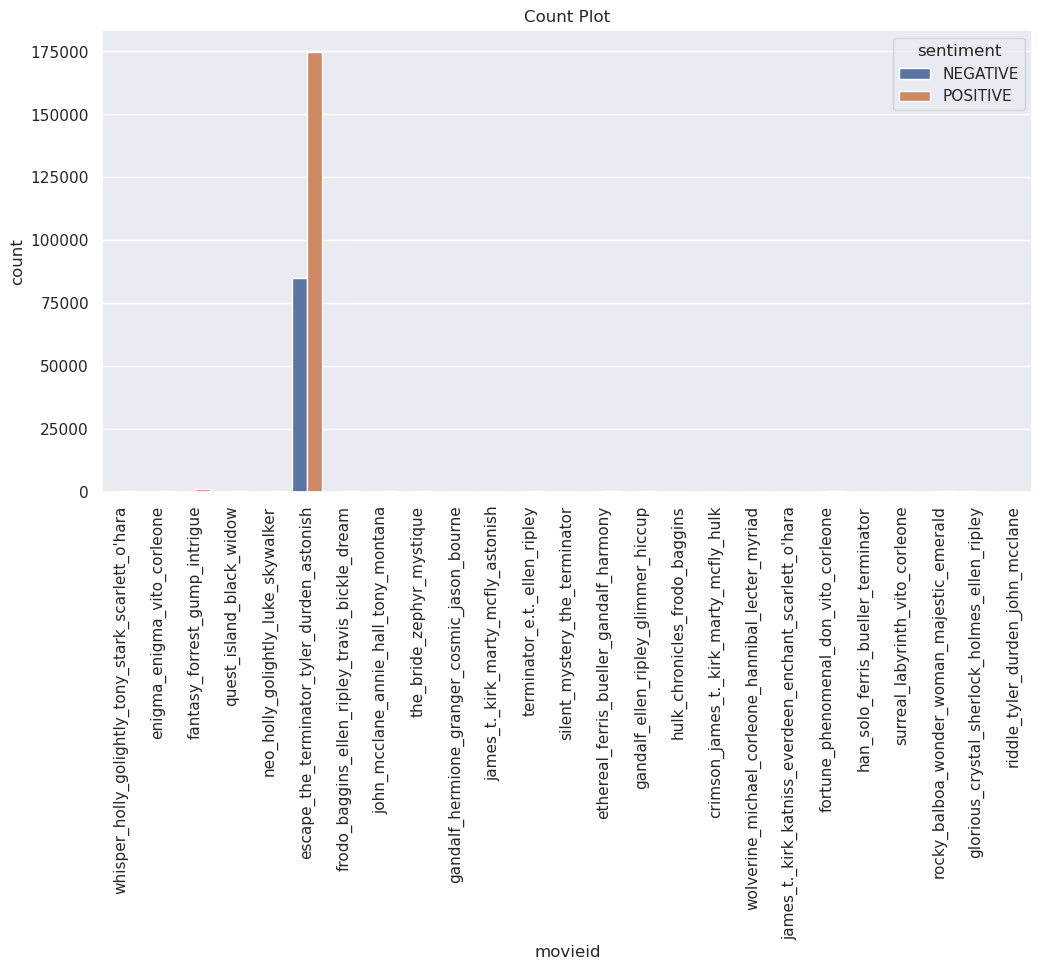

In [28]:
# Select the top 25 movies based on count
top_movies = transformed_df['movieid'].value_counts().nlargest(25).index

# Filter the dataframe for the top 25 movies
filtered_df = transformed_df[transformed_df['movieid'].isin(top_movies)]

# Count Plot
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_df, x="movieid", hue="sentiment")
plt.title("Count Plot")
plt.xticks(rotation=90)
plt.show()

### We can not use merge data for model building because of miss match in the shape of test data before and after merging it with movie column.
### We also can't do EDA on this data since most the values are missing in almost all the columns.
### We can't even do some data visualization because of there are some many categories in the each column. 
### It is almost impossible to visualize them it take too much time. and some how it we visulise only top 25 or 50 values it is not giving any usefull information.
### We can finally conclude that we can't have any benifite by merging movies to train and test and it is better to use only train and test for EDA, Visulisation and model builiding.

# EDA and Visulization on train data

In [29]:
# Percentage of Null values in each column
Null_Percent_In_Train = (Train_Data.isnull().sum() / Train_Data.isnull().count()).sort_values(ascending=False)
Null_Percent_In_Train

reviewText            0.039611
movieid               0.000000
reviewerName          0.000000
isFrequentReviewer    0.000000
sentiment             0.000000
dtype: float64

In [30]:
# Percentage of Null values in each column
Null_Percent_In_Test = (Test_Data.isnull().sum() / Test_Data.isnull().count()).sort_values(ascending=False)
Null_Percent_In_Test

reviewText      0.045376
movieid         0.000000
reviewerName    0.000000
isTopCritic     0.000000
dtype: float64

#### Here in train and test there is 4% of data have the Null Values in reviewText column. Ideally I would have removed them. because I think just by looking at this column, I can predict sentiment. But If I removed these values than shape of the test file will change, and also order of summision file will also change this won't give proper result for kaggle submission. 
#### Also I would not have removed this values if some kind numeric rate were to be present in the data which might have removed
#### some important information but here in this case removing 4% would have any effect insted of messing kaggle submision.

In [31]:
# Changing name "isTopCritic" to "isFrequentReviewer" in the test data set.
#df.rename(columns={'old_column_name': 'new_column_name'}, inplace=True)

Test_Data.rename(columns={'isTopCritic': 'isFrequentReviewer'}, inplace=True)

In [32]:
# Imputing ReviewTest Null values to the "Missing Review" text for both test and train data set

Train_Data['reviewText'].fillna("Missing Review", inplace=True)
Test_Data['reviewText'].fillna("Missing Review", inplace=True)

In [33]:
Train_Data.isnull().sum()

movieid               0
reviewerName          0
isFrequentReviewer    0
reviewText            0
sentiment             0
dtype: int64

In [34]:
Test_Data.isnull().sum()

movieid               0
reviewerName          0
isFrequentReviewer    0
reviewText            0
dtype: int64

In [35]:
# This will give number unique values in each columns
unique_counts_train = Train_Data.nunique()
print(unique_counts_train)

movieid                16812
reviewerName            4482
isFrequentReviewer         2
reviewText            155072
sentiment                  2
dtype: int64


In [36]:
# This will give number unique values in each columns
unique_counts_test = Test_Data.nunique()
print(unique_counts_test)

movieid               16786
reviewerName           4495
isFrequentReviewer        2
reviewText            52687
dtype: int64


#### Here also there are thousands of categories in for each column, same thing will happen which happened to the mereged dataset.
#### Still we can plot count plot is frequentReviewer in train and test data set.
#### we can also check if train data is balanced by sentiment column.
#### Maybe we can try dividing count plot by reviewerName column by color like stacked graph

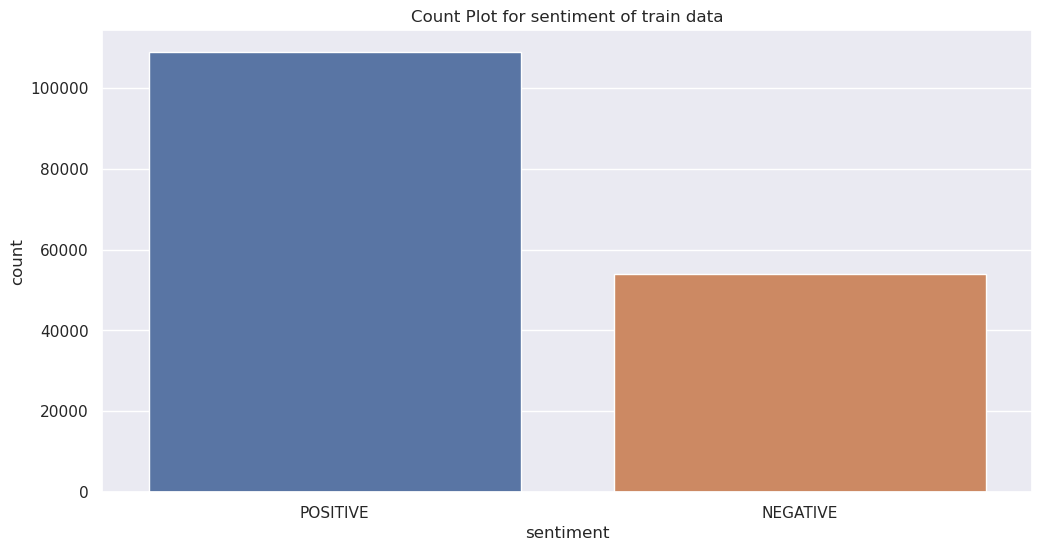

In [37]:
# Count Plot for sentiment of train data

plt.figure(figsize=(12, 6))
#sns.countplot(data= Train_Data, x="sentiment", hue="reviewerName")
sns.countplot(data= Train_Data, x="sentiment")
plt.title("Count Plot for sentiment of train data")
plt.show()

### Here We can that data is imbalence there are more positive reviews than negative reviews. 
### So while dividing data into train and validation set we need to take the special care to mentain this distribution.
### So that we have representative of both positive and negative values while training the model.

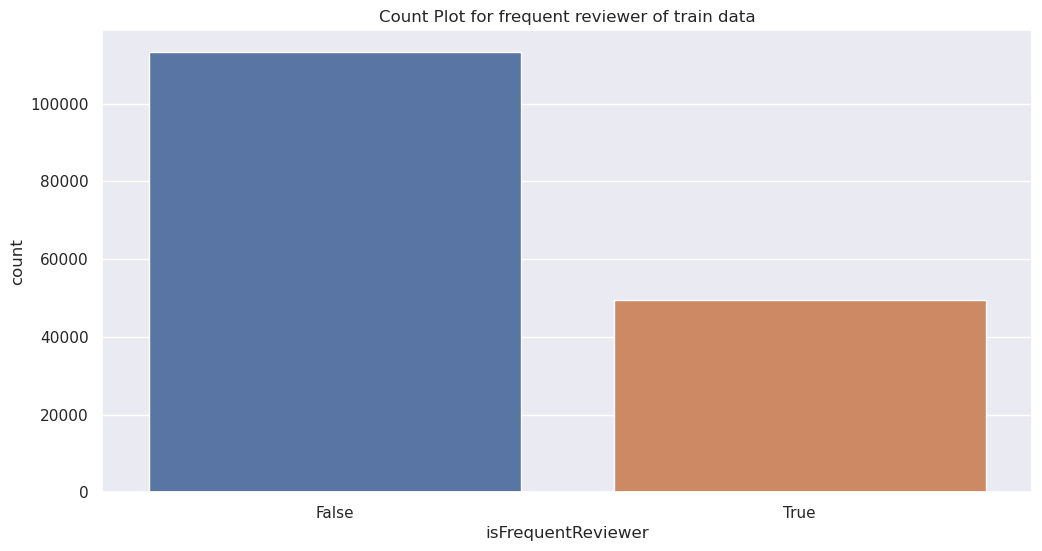

In [38]:
# Count Plot for sentiment of train data

plt.figure(figsize=(12, 6))
sns.countplot(data= Train_Data, x="isFrequentReviewer")
plt.title("Count Plot for frequent reviewer of train data")
plt.show()

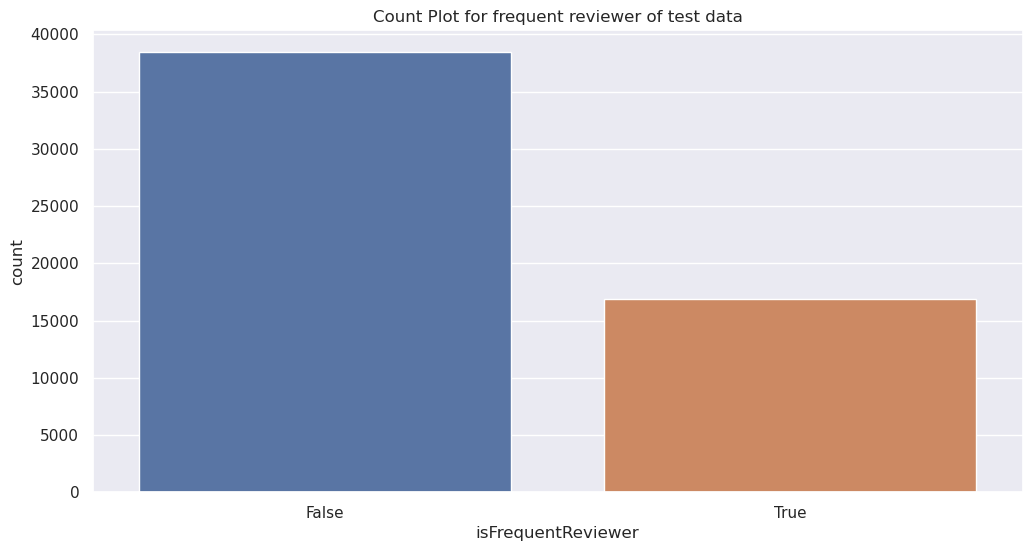

In [39]:
# Count Plot for sentiment of train data

plt.figure(figsize=(12, 6))
sns.countplot(data= Test_Data, x="isFrequentReviewer")
plt.title("Count Plot for frequent reviewer of test data")
plt.show()

### isFrequentReviewer column follows same distribution for train and test datasets

## Data Preproseing or transformation of "reviewText" column in both train and test

#### We have already imputed null values in the review text column.
#### Now we need to convert this column into numeric values so that we can build the model on this data set.

# Preprocessing data for model building

In [40]:
# %%time

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Load the train and test data frames
Train_Data = pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv')
Test_Data = pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv')

Test_Data.rename(columns={'isTopCritic': 'isFrequentReviewer'}, inplace=True)

print("Train_Data shape ", Train_Data.shape)

# Combine train and test data
combined_data = pd.concat([Train_Data, Test_Data], axis=0)

# # Using Pipeline to do imputation in the data.
# # I haven't use this technic since only thing I want change in the data is to impute missing values.
# # Just to that using pipeline was not that much feasible because after applying pipeline,
# # it's data type, column name, data sturcture,etc things changes which extra trouble for just changing one column.

# imputer = SimpleImputer(strategy='constant', fill_value='Missing Review')
# pipeline = Pipeline([('imputer', imputer)])
# combined_data = pipeline.fit_transform(combined_data)
# Train_Data = pipeline.fit_transform(Train_Data)
# Test_Data = pipeline.fit_transform(Test_Data)
# # Convert numpy.ndarray to pandas DataFrame
# combined_data = pd.DataFrame(combined_data)
# combined_data.head()


Train_Data shape  (162758, 5)


In [41]:
# Fill missing values in the reviewText column
combined_data['reviewText'].fillna("Missing Review", inplace=True)

# Imputing ReviewTest Null values to the "Missing Review" text for both test and train data set
Train_Data['reviewText'].fillna("Missing Review", inplace=True)
Test_Data['reviewText'].fillna("Missing Review", inplace=True)

# Select the columns to be used for sentiment prediction
text_columns = ['reviewText']  # Add all relevant text columns
non_text_columns = ["movieid", "reviewerName", "isFrequentReviewer"]  # Add all relevant non-text columns

label_encoder = LabelEncoder()

# Perform label encoding for non-text columns
for column in non_text_columns:
    combined_data[column] = label_encoder.fit_transform(combined_data[column])

# Create TF-IDF vectorizer for text columns
vectorizer = TfidfVectorizer(max_features=25000, stop_words='english')
# vectorizer = TfidfVectorizer(stop_words='english')
# This line gives momory error - Unable to allocate 88.0 GiB for an array with shape (162758, 72554) and data type float64
combined_text_vectors = vectorizer.fit_transform(combined_data['reviewText'])

# Best thing about Tfidfvectorizer that we don't have to remove special character and punctuations it will remove them by default
# also stop_words argument will remove stop words from the feature column and max_feature will select top n most frequent features.

# # Split back into train and test data (Neeeded only for LDA)
# X_train_text_vectors = combined_text_vectors[:len(Train_Data)]
# X_test_text_vectors = combined_text_vectors[len(Train_Data):]

## Using PCA or LDA or SVD here

In [42]:
# # Use PCA for dimensionality reduction
# from sklearn.decomposition import PCA
# pca = PCA(n_components=0.95, random_state=5)
# X_train_pca = pca.fit_transform(X_train_text_vectors)
# # This code gives error saying that - TypeError: PCA does not support sparse input. See TruncatedSVD for a possible alternative.

# If I change X_train_vectors data type from sparse to normal data frame then i think size matrix will also grow significantly.
# X_sparse with shape (1000, 10000), representing 1000 samples and 10000 features (words). If the sparsity of the matrix 
# is around 99% (i.e., most of the entries are zeros), the original sparse matrix may take only a few megabytes of memory. 

In [43]:
%%time

# Use TruncatedSVD for dimensionality reduction
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2500, random_state=5)  
combined_text_vectors_svd = svd.fit_transform(combined_text_vectors)

CPU times: user 27min 29s, sys: 2min 6s, total: 29min 35s
Wall time: 11min 31s


In [44]:
combined_text_vectors.shape

(218073, 25000)

In [45]:
combined_text_vectors_svd.shape

(218073, 2500)

In [46]:
# # Using LDA Here
# from sklearn.decomposition import LatentDirichletAllocation as LDA

# # Assuming you have the labels in the 'label' column of X_train
# y_train = Train_Data['sentiment']

# # Initialize and fit LDA
# lda = LDA(n_components=1000, random_state=5)  # Specify the number of topics (components)
# X_train_lda = lda.fit_transform(X_train_text_vectors, y_train)

# # But problem with this is that LDA doesn't actully select top 1000 features but it gives project of Train data on 1000 axis
# # we don't know the y_test so we not be able to do projection of Test_Data. - Worng only while finding the lda matrix we need labels (maybe)

# X_test_lda = lda.transform(X_test_text_vectors)

# # I think I shouldn't LDA it doesn't seems logical. and also This part is taking too much time to run and understand. 

In [47]:
# Split back combined into original train and test data from kaggle
X_train_text_vectors = combined_text_vectors_svd[:len(Train_Data)]
X_test_text_vectors = combined_text_vectors_svd[len(Train_Data):]

# Reset the index of combined_data
combined_data = combined_data.reset_index(drop=True)

# Combine text vectors with non-text columns for train and test data
# X_train_vectors = pd.concat([pd.DataFrame(X_train_text_vectors), combined_data.loc[0:len(Train_Data)-1, non_text_columns]], axis=1)
# X_test_vectors = pd.concat([pd.DataFrame(X_test_text_vectors), combined_data.loc[len(Train_Data):len(Train_Data)+len(Test_Data)].reset_index(drop=True)[non_text_columns]], axis=1)
X_train_vectors = pd.concat([pd.DataFrame(X_train_text_vectors)], axis=1)
X_test_vectors = pd.concat([pd.DataFrame(X_test_text_vectors)], axis=1)

print("X_train_vectors shape ", X_train_vectors.shape)

X_train_vectors shape  (162758, 2500)


### After adding the label encoded "non_text_columns" into the data our accurcy have decreased by around 10%. This is unsual because add more columns should increase the accrucy instead but here it is decreasing. 
### Why? - My opinion - Since in "non_text_columns" movieid, reviewer name are identity column, label encoder would give random value to each id which is not related to the sentiment at all and since most classification algorithum has have assumption of linear speparabilty and because this id columns there linear spearability might be getting violated maybe because of that it is giving the less accurcy. - 
### I got this insight when I fitted the logisitic model including "non_text_columns" all predicted values were positive. But when removed that "non_text_columns" from data and again fitted the model. It gave both positive and negative values properly while predicting. 

In [48]:
X_train_vectors.head()

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,0.000303,0.053592,-0.029163,0.096191,0.066490,0.007960,-0.008268,-0.011779,0.010164,-0.010058,...,0.017011,0.000806,0.004451,0.007015,-0.005160,-0.011186,0.005624,-0.014033,-0.019224,-0.000528
1,0.000368,0.062781,-0.024856,0.007713,-0.068094,0.076720,0.007843,-0.022360,-0.050312,-0.015216,...,-0.007343,-0.016983,-0.001971,-0.004673,-0.023845,0.017923,-0.016506,0.005211,0.003269,-0.006832
2,0.000361,0.067709,-0.024377,0.009452,-0.047269,0.009957,0.019961,0.020894,0.012431,0.080011,...,0.015808,0.006183,0.000267,-0.010441,-0.001964,0.005258,-0.001182,-0.011174,-0.002852,-0.028000
3,0.000250,0.034443,-0.011824,0.002734,-0.018978,0.004902,-0.011090,0.001495,0.004868,0.010710,...,0.010959,-0.007538,-0.028489,-0.005320,-0.000430,-0.001824,0.005805,-0.014871,0.009899,0.008373
4,0.000417,0.054058,-0.017594,-0.011306,-0.071098,-0.024551,-0.053639,-0.037499,0.097080,-0.060347,...,-0.002311,0.003363,0.001194,0.012897,0.002314,0.005009,0.001367,-0.010846,0.002282,0.001368


In [49]:
type(X_train_vectors)

pandas.core.frame.DataFrame

## Spliting the data

In [50]:
%%time

from sklearn.model_selection import StratifiedShuffleSplit

# Reset the index of the DataFrame
X_train_vectors = X_train_vectors.reset_index(drop=True)
Train_Data['sentiment'] = Train_Data['sentiment'].reset_index(drop=True)

# Initialize the StratifiedShuffleSplit with the desired parameters
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=5)

# Perform the stratified shuffle split on the data
for train_indices, val_indices in splitter.split(X_train_vectors, Train_Data['sentiment']):
    X_train, X_val = X_train_vectors.loc[train_indices], X_train_vectors.loc[val_indices]
    y_train, y_val = Train_Data['sentiment'].loc[train_indices], Train_Data['sentiment'].loc[val_indices]

# Print the sizes of each set
print("Training set size:", X_train.shape[0])
print("Validation set size:", X_val.shape[0])

# # This is another approch to split the data but I didn't use this approch because this data was imbalance.
# # Also I try to implement SMOTE but it was not parctical because data was already to big and 
# # adding some extra observating was keep giving memory error

# # Split train data into train and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X_train_vectors, Train_Data['sentiment'], test_size=0.2, random_state=42)

X_test = X_test_vectors

print("shape of X_train_vectors", X_train_vectors.shape)
# print("Checking null values", X_train_vectors.isnull().sum())

Training set size: 130206
Validation set size: 32552
shape of X_train_vectors (162758, 2500)
CPU times: user 3.22 s, sys: 1.17 s, total: 4.39 s
Wall time: 4.39 s


# Comparing different model by validataion set to select the best model.

In [51]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# classification_report()

def Classification_Model_Adequacy(y_val, val_predictions):
    # Calculate the confusion matrix
    cm = confusion_matrix(y_val, val_predictions)

    # Create a DataFrame from the confusion matrix
    cm_df = pd.DataFrame(cm, index=['True 1', 'True 0'], columns=['Predicted 1', 'Predicted 0'])

    # Extract the TP, FP, TN, and FN values from the confusion matrix
    TN, FP, FN, TP = cm.ravel()

    # Print the confusion matrix
    print("Confusion Matrix:")
    print(cm_df)

    print("_______________________________________________________________")

    # Calculate the overall accuracy
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    print(f"Accuracy: {accuracy}")

    # Calculate precision and recall (sensitivity or true positive rate)
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")

    # Calculate specificity (true negative rate)
    specificity = TN / (TN + FP)
    print(f"Specificity: {specificity}")

    # Calculate F1 score (harmonic mean of precision and recall)
    f1_score = 2 * (precision * recall) / (precision + recall)
    print(f"F1 Score: {f1_score}")

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(true_labels, predicted_labels, labels=None):
    """
    Plot the confusion matrix as a heatmap.

    Parameters:
        true_labels (array-like): True labels of the data.
        predicted_labels (array-like): Predicted labels from the model.
        labels (list or array-like, optional): List of class labels to be used for plotting.

    Returns:
        None (displays the plot)
    """
    # Compute the confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)

    # Get the class labels
    if labels is None:
        labels = list(set(true_labels) | set(predicted_labels))

    # Plot the confusion matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

Accuracy: 0.7758663062177439
______________________________________________________________


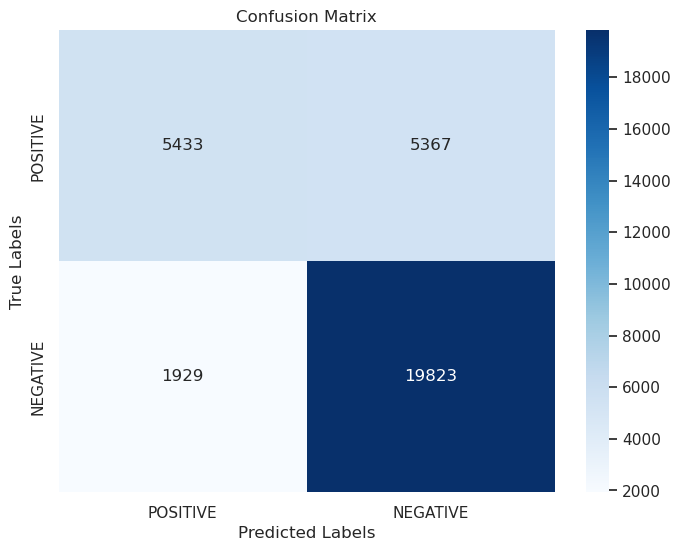

              precision    recall  f1-score   support

    NEGATIVE       0.74      0.50      0.60     10800
    POSITIVE       0.79      0.91      0.84     21752

    accuracy                           0.78     32552
   macro avg       0.76      0.71      0.72     32552
weighted avg       0.77      0.78      0.76     32552

______________________________________________________________
CPU times: user 1min 48s, sys: 6.11 s, total: 1min 54s
Wall time: 33.4 s


In [53]:
%%time

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train a logistic regression model
# logreg_classifier = LogisticRegression(penalty = 'l2', solver = 'sag')
logreg_classifier = LogisticRegression()
logreg_classifier.fit(X_train, y_train)

# Make predictions on the test set
val_predictions_log = logreg_classifier.predict(X_val)

# Calculate accuracy
accuracy_log = accuracy_score(y_val, val_predictions_log)
print(f"Accuracy: {accuracy_log}")

print("______________________________________________________________")

# Print classification report for precision, recall, f1-score, support
# Classification_Model_Adequacy(y_val, val_predictions_log)
plot_confusion_matrix(y_val, val_predictions_log)
print(classification_report(y_val, val_predictions_log))

print("______________________________________________________________")

Validation Accuracy (LinearSVC): 0.7778938314082084
______________________________________________________________


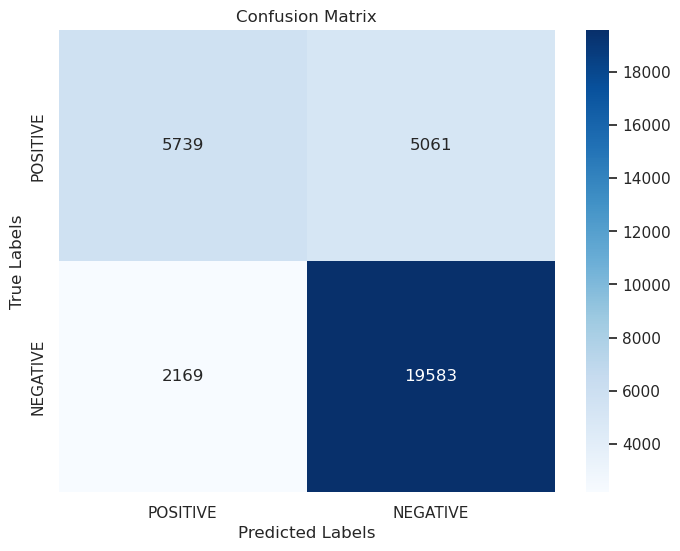

              precision    recall  f1-score   support

    NEGATIVE       0.73      0.53      0.61     10800
    POSITIVE       0.79      0.90      0.84     21752

    accuracy                           0.78     32552
   macro avg       0.76      0.72      0.73     32552
weighted avg       0.77      0.78      0.77     32552

______________________________________________________________
CPU times: user 1min 15s, sys: 4.14 s, total: 1min 19s
Wall time: 1min 18s


In [54]:
%%time

from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

# Create Linear Support Vector Classifier (LinearSVC)
svc_classifier = LinearSVC(random_state=5)

# Train the model
svc_classifier.fit(X_train, y_train)

# Make predictions on the validation set
val_predictions_svc = svc_classifier.predict(X_val)

# Calculate accuracy on the validation set
accuracy_svc = accuracy_score(y_val, val_predictions_svc)
print(f"Validation Accuracy (LinearSVC): {accuracy_svc}")

print("______________________________________________________________")

# Print classification report for precision, recall, f1-score, support
# Classification_Model_Adequacy(y_val, val_predictions_log)
plot_confusion_matrix(y_val, val_predictions_svc)
print(classification_report(y_val, val_predictions_svc))

print("______________________________________________________________")

Validation Accuracy: 0.7355615630376013
______________________________________________________________


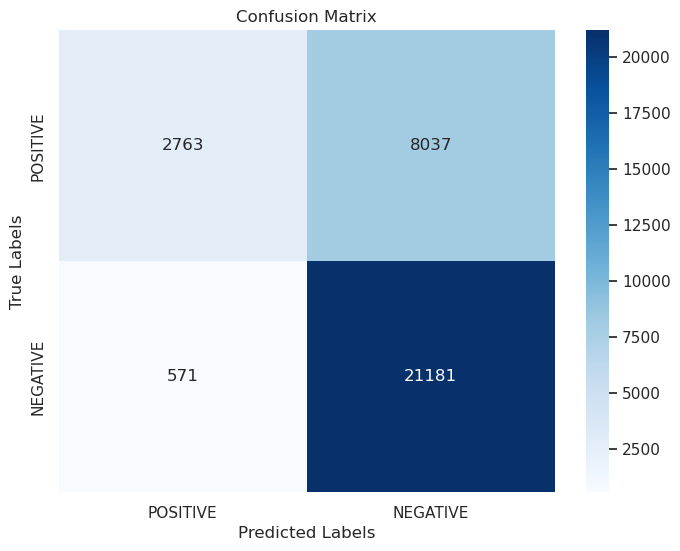

              precision    recall  f1-score   support

    NEGATIVE       0.83      0.26      0.39     10800
    POSITIVE       0.72      0.97      0.83     21752

    accuracy                           0.74     32552
   macro avg       0.78      0.61      0.61     32552
weighted avg       0.76      0.74      0.69     32552

______________________________________________________________
CPU times: user 17 s, sys: 852 ms, total: 17.8 s
Wall time: 17.2 s


In [55]:
%%time

# SGD Classifier

from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

# We can try different loss function modified_huber, hinge, log, squared_hinge, perceptron

# Create SGD Classifier classifier
sgd_classifier = SGDClassifier(loss='hinge', max_iter=750, random_state=5)

# Train the model
sgd_classifier.fit(X_train, y_train)

# Make predictions on the validation set
val_predictions_sgd = sgd_classifier.predict(X_val)

# Calculate accuracy on the validation set
accuracy_sgd = accuracy_score(y_val, val_predictions_sgd)
print(f"Validation Accuracy: {accuracy_sgd}")

print("______________________________________________________________")

# Print classification report for precision, recall, f1-score, support
# Classification_Model_Adequacy(y_val, val_predictions_sgd)
plot_confusion_matrix(y_val, val_predictions_sgd)
print(classification_report(y_val, val_predictions_sgd))

print("______________________________________________________________")

Validation Accuracy: 0.7214303268616368
______________________________________________________________


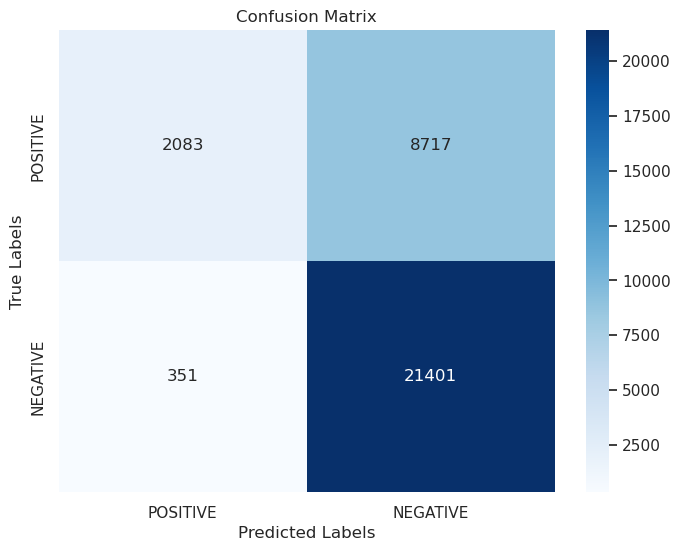

Confusion Matrix:
        Predicted 1  Predicted 0
True 1         2083         8717
True 0          351        21401
_______________________________________________________________
Accuracy: 0.7214303268616368
Precision: 0.7105717511122916
Recall: 0.9838635527767562
Specificity: 0.19287037037037036
F1 Score: 0.8251783304414884
______________________________________________________________
CPU times: user 8.06 s, sys: 824 ms, total: 8.88 s
Wall time: 8.19 s


In [56]:
%%time

# Perceptron Algorithum

from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# Create Perceptron classifier
perceptron = Perceptron()

# Train the model
perceptron.fit(X_train, y_train)

# Make predictions on the validation set
val_predictions_perc = perceptron.predict(X_val)

# Calculate accuracy on the validation set
accuracy_perc = accuracy_score(y_val, val_predictions_perc)
print(f"Validation Accuracy: {accuracy_perc}")

print("______________________________________________________________")

plot_confusion_matrix(y_val, val_predictions_perc)
Classification_Model_Adequacy(y_val, val_predictions_perc)

print("______________________________________________________________")

Accuracy: 0.6008540181862866
______________________________________________________________


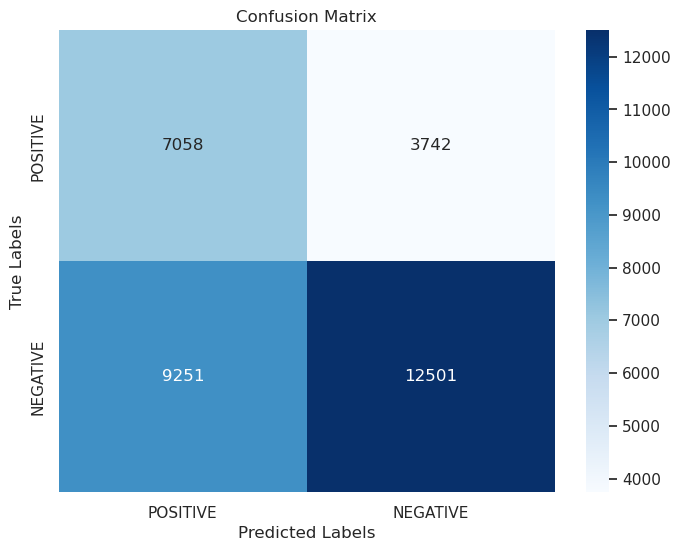

              precision    recall  f1-score   support

    NEGATIVE       0.43      0.65      0.52     10800
    POSITIVE       0.77      0.57      0.66     21752

    accuracy                           0.60     32552
   macro avg       0.60      0.61      0.59     32552
weighted avg       0.66      0.60      0.61     32552

______________________________________________________________
CPU times: user 8.36 s, sys: 2.09 s, total: 10.5 s
Wall time: 10.2 s


In [57]:
%%time

# Gaussian Naive Bayes

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Create Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the model
gnb.fit(X_train, y_train)

# Make predictions on the test set
val_predictions_gnb = gnb.predict(X_val)

# Calculate accuracy
accuracy_gnb = accuracy_score(y_val, val_predictions_gnb)
print("Accuracy:", accuracy_gnb)

print("______________________________________________________________")

# Classification_Model_Adequacy(y_val, val_predictions_gnb)
plot_confusion_matrix(y_val, val_predictions_gnb)
print(classification_report(y_val, val_predictions_gnb))

print("______________________________________________________________")

In [58]:
%%time

# Import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=5)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the validation set
val_predictions_rf = rf_classifier.predict(X_val)

# Calculate accuracy on the validation set
val_accuracy = accuracy_score(y_val, val_predictions_rf)
print(f"Validation Accuracy: {val_accuracy}")

print("______________________________________________________________")

Classification_Model_Adequacy(y_val, val_predictions_rf)

print("______________________________________________________________")

Validation Accuracy: 0.6682231506512657
______________________________________________________________
Confusion Matrix:
        Predicted 1  Predicted 0
True 1            0        10800
True 0            0        21752
_______________________________________________________________
Accuracy: 0.6682231506512657
Precision: 0.6682231506512657
Recall: 1.0
Specificity: 0.0
F1 Score: 0.8011196228638775
______________________________________________________________
CPU times: user 6min 27s, sys: 355 ms, total: 6min 27s
Wall time: 6min 27s


In [59]:
# %%time

# # K-Nearest Neighbors (KNN)

# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import accuracy_score

# # Create KNN classifier
# knn = KNeighborsClassifier(n_neighbors=5)

# # Train the model
# knn.fit(X_train, y_train)

# # Make predictions on the test set
# val_predictions_knn = knn.predict(X_val)

# # Calculate accuracy
# accuracy = accuracy_score(y_val, val_predictions_knn)
# print("Accuracy:", accuracy)

# print("______________________________________________________________")

# Classification_Model_Adequacy(y_val, val_predictions_knn)

# print("______________________________________________________________")

In [60]:
# %%time

# # Import required libraries
# from sklearn.neural_network import MLPClassifier
# from sklearn.metrics import accuracy_score

# # Create Multi-layer Perceptron classifier
# mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), batch_size=64, max_iter=200, random_state=5,
#                                solver='adam', activation='relu')
# # The 'hidden_layer_sizes' parameter specifies the number of neurons in each hidden layer.
# # You can adjust these values based on your problem and dataset.
# # 'batch_size' specifies the number of samples used in each update step.

# # Train the model
# mlp_classifier.fit(X_train, y_train)

# # Make predictions on the validation set
# val_predictions_mlp = mlp_classifier.predict(X_val)

# # Calculate accuracy on the validation set
# accuracy_mlp = accuracy_score(y_val, val_predictions_mlp)
# print(f"Validation Accuracy (MLP): {accuracy_mlp}")

# print("______________________________________________________________")

# # Print classification report for precision, recall, f1-score, support
# # Classification_Model_Adequacy(y_val, val_predictions_mlp)
# plot_confusion_matrix(y_val, val_predictions_mlp)
# print(classification_report(y_val, val_predictions_mlp))

# print("______________________________________________________________")

## I didn't run this 2 algorithum here because It was taking too much time. 

# Hyper-parameter Tunning of best selected model

### Tuning for Linear SVC

In [61]:
%%time

from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
param_grid_svc = [
    {'C': [0.01, 0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2'],   # Fixed to 'l2'
    'dual': [False],     # Fixed to False
    'max_iter': [1500]},
    {'loss': ['hinge', 'squared_hinge']},
]

# ValueError: Unsupported set of arguments: The combination of penalty='l2' and loss='hinge' are not supported when dual=False,
# Parameters: penalty='l2', loss='hinge', dual=False

# Create Linear Support Vector Classifier (LinearSVC)
svc_classifier = LinearSVC(random_state=5)

# Create GridSearchCV with 5-fold cross-validation
grid_search_svc = GridSearchCV(svc_classifier, param_grid_svc, cv=5, scoring='accuracy')

# Train the model and perform the grid search to find the best hyperparameters
grid_search_svc.fit(X_train, y_train)

# Get the best hyperparameters
best_params_svc = grid_search_svc.best_params_
print("Best Hyperparameters:", best_params_svc)

# Use the best model found by GridSearchCV for predictions on the validation set
best_model_svc = grid_search_svc.best_estimator_
val_predictions_svc = best_model_svc.predict(X_val)

# Calculate accuracy on the validation set
accuracy_svc_hyp = accuracy_score(y_val, val_predictions_svc)
print(f"Accuracy (LinearSVC): {accuracy_svc_hyp}")

print("______________________________________________________________")

# Print classification report for precision, recall, f1-score, support
print(classification_report(y_val, val_predictions_svc))

print("______________________________________________________________")

Best Hyperparameters: {'C': 1.0, 'dual': False, 'max_iter': 1500, 'penalty': 'l1'}
Accuracy (LinearSVC): 0.7780781518800688
______________________________________________________________
              precision    recall  f1-score   support

    NEGATIVE       0.73      0.53      0.61     10800
    POSITIVE       0.79      0.90      0.84     21752

    accuracy                           0.78     32552
   macro avg       0.76      0.72      0.73     32552
weighted avg       0.77      0.78      0.77     32552

______________________________________________________________
CPU times: user 1h 51min 44s, sys: 4min 16s, total: 1h 56min 1s
Wall time: 1h 55min 44s


In [62]:
grid_search_svc.best_params_

{'C': 1.0, 'dual': False, 'max_iter': 1500, 'penalty': 'l1'}

In [63]:
grid_search_svc.best_score_

0.7782590618084511

In [64]:
cvres = grid_search_svc.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(-mean_score, params)

-0.6934242623745798 {'C': 0.01, 'dual': False, 'max_iter': 1500, 'penalty': 'l1'}
-0.7302966167607342 {'C': 0.01, 'dual': False, 'max_iter': 1500, 'penalty': 'l2'}
-0.7688739255440475 {'C': 0.1, 'dual': False, 'max_iter': 1500, 'penalty': 'l1'}
-0.774081062278128 {'C': 0.1, 'dual': False, 'max_iter': 1500, 'penalty': 'l2'}
-0.7782590618084511 {'C': 1.0, 'dual': False, 'max_iter': 1500, 'penalty': 'l1'}
-0.778236023872854 {'C': 1.0, 'dual': False, 'max_iter': 1500, 'penalty': 'l2'}
-0.7780977735507566 {'C': 10.0, 'dual': False, 'max_iter': 1500, 'penalty': 'l1'}
-0.7781131339439826 {'C': 10.0, 'dual': False, 'max_iter': 1500, 'penalty': 'l2'}
-0.7746340367291822 {'loss': 'hinge'}
-0.7782283436762409 {'loss': 'squared_hinge'}


### Tunning for logistic regression

In [65]:
%%time

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
param_grid_log = [
    {'C': [0.01, 1.0, 10.0],  # Regularization strength values to try
    'penalty': ['l1', 'l2'],      # Types of regularization penalties to try
    'max_iter': [300],   # Maximum number of iterations to try
    'solver': ['liblinear',  'saga'],   # Solvers to try
#     'class_weight': ['balanced']
    },
    
    {'C': [0.01, 1.0, 10.0],
     'solver': ['lbfgs', 'sag', 'newton-cg'],
     'penalty': ['l2'],
     'max_iter': [300],
#      'class_weight': ['balanced']
    }
]
    
# Create Logistic Regression classifier
logreg_classifier = LogisticRegression()

# Create GridSearchCV with 5-fold cross-validation
grid_search_log = GridSearchCV(logreg_classifier, param_grid_log, cv=5, scoring='accuracy')

# Perform the grid search to find the best hyperparameters
grid_search_log.fit(X_train, y_train)

# Get the best hyperparameters
best_params_log = grid_search_log.best_params_
print("Best Hyperparameters:", best_params_log)

# Use the best model found by GridSearchCV for predictions on the validation set
best_model_log = grid_search_log.best_estimator_
val_predictions_logreg = best_model_log.predict(X_val)

# Calculate accuracy on the validation set
accuracy_log_hyp = accuracy_score(y_val, val_predictions_logreg)
print(f"Accuracy (Logistic Regression): {accuracy_log_hyp}")

print("______________________________________________________________")

# Print classification report for precision, recall, f1-score, support
print(classification_report(y_val, val_predictions_logreg))

print("______________________________________________________________")

Best Hyperparameters: {'C': 10.0, 'max_iter': 300, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy (Logistic Regression): 0.7792455148685181
______________________________________________________________
              precision    recall  f1-score   support

    NEGATIVE       0.72      0.55      0.62     10800
    POSITIVE       0.80      0.90      0.84     21752

    accuracy                           0.78     32552
   macro avg       0.76      0.72      0.73     32552
weighted avg       0.77      0.78      0.77     32552

______________________________________________________________
CPU times: user 3h 29min 5s, sys: 10min 22s, total: 3h 39min 27s
Wall time: 2h 54min 45s


In [66]:
grid_search_log.best_score_

0.7785201920322835

In [67]:
grid_search_log.best_params_

{'C': 10.0, 'max_iter': 300, 'penalty': 'l2', 'solver': 'lbfgs'}

In [68]:
cvres = grid_search_log.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(-mean_score, params)

-0.6682410940943496 {'C': 0.01, 'max_iter': 300, 'penalty': 'l1', 'solver': 'liblinear'}
-0.6682564536028284 {'C': 0.01, 'max_iter': 300, 'penalty': 'l1', 'solver': 'saga'}
-0.6685713407792154 {'C': 0.01, 'max_iter': 300, 'penalty': 'l2', 'solver': 'liblinear'}
-0.6685636605826024 {'C': 0.01, 'max_iter': 300, 'penalty': 'l2', 'solver': 'saga'}
-0.7776907337472336 {'C': 1.0, 'max_iter': 300, 'penalty': 'l1', 'solver': 'liblinear'}
-0.7776600132556972 {'C': 1.0, 'max_iter': 300, 'penalty': 'l1', 'solver': 'saga'}
-0.7757630173736564 {'C': 1.0, 'max_iter': 300, 'penalty': 'l2', 'solver': 'liblinear'}
-0.775739977078733 {'C': 1.0, 'max_iter': 300, 'penalty': 'l2', 'solver': 'saga'}
-0.7783358699678127 {'C': 10.0, 'max_iter': 300, 'penalty': 'l1', 'solver': 'liblinear'}
-0.7783512300661231 {'C': 10.0, 'max_iter': 300, 'penalty': 'l1', 'solver': 'saga'}
-0.7785048313441416 {'C': 10.0, 'max_iter': 300, 'penalty': 'l2', 'solver': 'liblinear'}
-0.778504831049226 {'C': 10.0, 'max_iter': 300, 'pe

### Tuning for SGD Classifier

In [69]:
%%time

from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
param_grid_sgd = [
    {'loss': ['hinge', 'modified_huber', 'squared_hinge']},
    
    {'alpha': [0, 0.0001, 0.001, 0.1],
#     'penalty': ['l1', 'l2', 'elasticnet','none'],
    'penalty': ['l1', 'l2'],
    'max_iter': [2000]},
    
    {'alpha': [0.0001, 0.001, 0.1],
    'l1_ratio': [0.1, 0.5, 0.7],
    'penalty': ['elasticnet'],
    'max_iter': [2000]},
    
    {'learning_rate': ['optimal', 'invscaling', 'adaptive'],
    'max_iter': [2000]}
]

# Create SGD Classifier classifier
sgd_classifier = SGDClassifier(random_state=5)

# Create GridSearchCV with 5-fold cross-validation
grid_search_sgd = GridSearchCV(sgd_classifier, param_grid_sgd, cv=5, scoring='accuracy')

# Train the model and perform the grid search to find the best hyperparameters
grid_search_sgd.fit(X_train, y_train)

# Get the best hyperparameters
best_params_sgd = grid_search_sgd.best_params_
print("Best Hyperparameters:", best_params_sgd)

# Use the best model found by GridSearchCV for predictions on the validation set
best_model_sgd = grid_search_sgd.best_estimator_
val_predictions_sgd = best_model_sgd.predict(X_val)

# Calculate accuracy on the validation set
accuracy_sgd_hyp = accuracy_score(y_val, val_predictions_sgd)
print(f"Accuracy (SGD Classifier): {accuracy_sgd_hyp}")

print("______________________________________________________________")

# Print classification report for precision, recall, f1-score, support
print(classification_report(y_val, val_predictions_sgd))

print("______________________________________________________________")

Best Hyperparameters: {'loss': 'modified_huber'}
Accuracy (SGD Classifier): 0.7662816416810027
______________________________________________________________
              precision    recall  f1-score   support

    NEGATIVE       0.78      0.41      0.54     10800
    POSITIVE       0.76      0.94      0.84     21752

    accuracy                           0.77     32552
   macro avg       0.77      0.68      0.69     32552
weighted avg       0.77      0.77      0.74     32552

______________________________________________________________
CPU times: user 1h 36min 28s, sys: 2min 13s, total: 1h 38min 42s
Wall time: 1h 38min 7s


In [70]:
grid_search_sgd.best_score_

0.7723684182470512

In [71]:
grid_search_sgd.best_params_

{'loss': 'modified_huber'}

In [72]:
cvres = grid_search_sgd.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(-mean_score, params)

-0.7380842163905452 {'loss': 'hinge'}
-0.7723684182470512 {'loss': 'modified_huber'}
-0.719552157360357 {'loss': 'squared_hinge'}
nan {'alpha': 0, 'max_iter': 2000, 'penalty': 'l1'}
nan {'alpha': 0, 'max_iter': 2000, 'penalty': 'l2'}
-0.7356573010981622 {'alpha': 0.0001, 'max_iter': 2000, 'penalty': 'l1'}
-0.7380842163905452 {'alpha': 0.0001, 'max_iter': 2000, 'penalty': 'l2'}
-0.668241094979097 {'alpha': 0.001, 'max_iter': 2000, 'penalty': 'l1'}
-0.6682641349791045 {'alpha': 0.001, 'max_iter': 2000, 'penalty': 'l2'}
-0.668241094979097 {'alpha': 0.1, 'max_iter': 2000, 'penalty': 'l1'}
-0.668241094979097 {'alpha': 0.1, 'max_iter': 2000, 'penalty': 'l2'}
-0.7359875259592608 {'alpha': 0.0001, 'l1_ratio': 0.1, 'max_iter': 2000, 'penalty': 'elasticnet'}
-0.7301891143573401 {'alpha': 0.0001, 'l1_ratio': 0.5, 'max_iter': 2000, 'penalty': 'elasticnet'}
-0.7341596813383147 {'alpha': 0.0001, 'l1_ratio': 0.7, 'max_iter': 2000, 'penalty': 'elasticnet'}
-0.668241094979097 {'alpha': 0.001, 'l1_ratio

# Visulization of model adenqucy by different curve

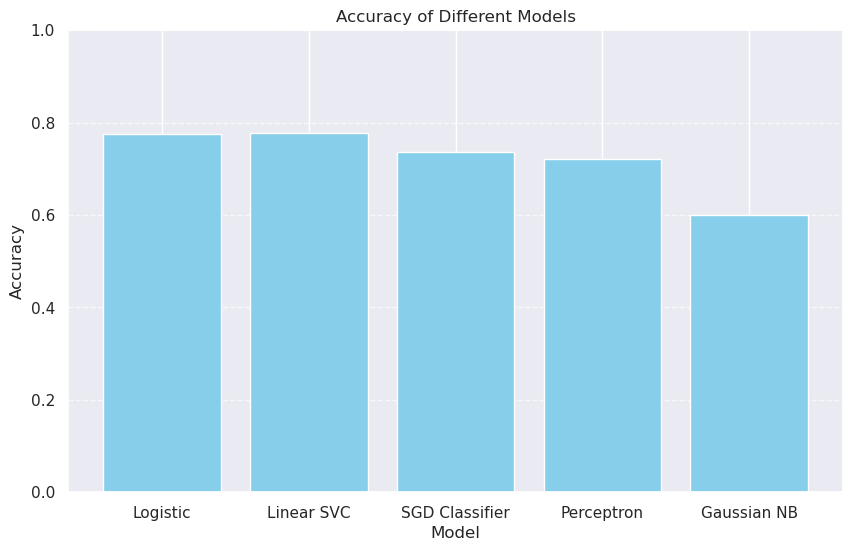

In [73]:
import matplotlib.pyplot as plt

# List of model names
model_names = ['Logistic', 'Linear SVC', 'SGD Classifier', 'Perceptron', 'Gaussian NB']

# List of accuracy values corresponding to each model
accuracy_values = [accuracy_log, accuracy_svc, accuracy_sgd, accuracy_perc, accuracy_gnb]

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_values, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0, 1)  # Set the y-axis range from 0 to 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve_for_model(best_model, X_val, y_val):
    # Get confidence scores using decision_function
    conf_scores = best_model.decision_function(X_val)

    # Convert confidence scores to probabilities using the sigmoid function
    probs_positive_class = 1 / (1 + np.exp(-conf_scores))

    # Convert string labels to numeric values (0 for 'NEGATIVE' and 1 for 'POSITIVE')
    y_val_numeric = y_val.replace({'NEGATIVE': 0, 'POSITIVE': 1})

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_val_numeric, probs_positive_class)

    # Compute the area under the ROC curve (AUC)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

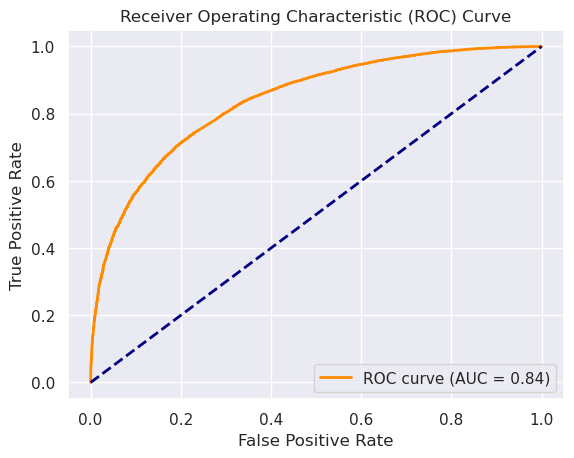

In [77]:
plot_roc_curve_for_model(best_model_svc, X_val, y_val)

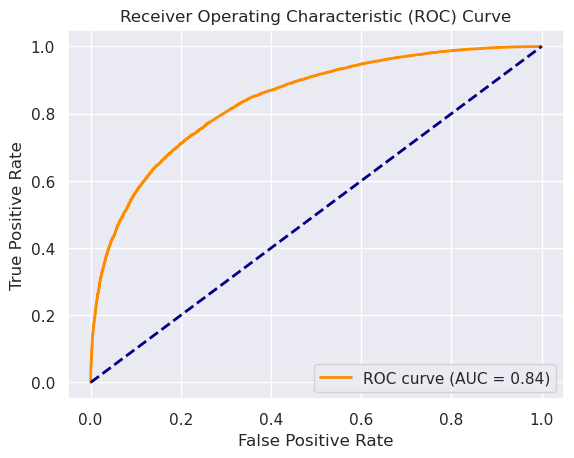

In [78]:
plot_roc_curve_for_model(best_model_log, X_val, y_val)

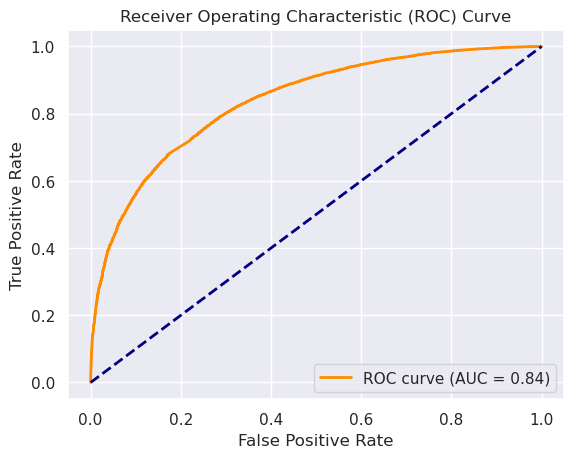

In [79]:
plot_roc_curve_for_model(best_model_sgd, X_val, y_val)

# Prediction of final test data and making submission file

In [80]:
# %%time

# from sklearn.svm import LinearSVC

# # Create SVC classifier
# # model = SVC(kernel='linear', random_state=5)
# model = LinearSVC(random_state=5, C=0.01, dual=False, max_iter=1500, penalty='l2', loss='squared_hinge')

# # Train the model
# model.fit(X_train_vectors, Train_Data['sentiment'])

# # Make predictions on the validation set
# predictions = model.predict(X_test)

In [94]:
%%time

from sklearn.linear_model import LogisticRegression

# Train a logistic regression model
model = LogisticRegression(C= 10.0, max_iter= 300, penalty= 'l2', solver= 'liblinear')
model.fit(X_train_vectors, Train_Data['sentiment'])

# Make predictions on the test set
predictions = model.predict(X_test)

CPU times: user 4min 2s, sys: 10.3 s, total: 4min 12s
Wall time: 4min 12s


In [95]:
# %%time

# from sklearn.linear_model import SGDClassifier

# # Create SGD Classifier classifier
# # model = SGDClassifier(loss= 'modified_huber', learning_rate= 'optimal', alpha= 0.0001, l1_ratio= 0.1, max_iter= 2000, penalty= 'elasticnet', random_state=5)
# model = SGDClassifier(loss= 'modified_huber', learning_rate= 'optimal', alpha= 0.0001, max_iter= 2000, penalty= 'l1', random_state=5)

# # Train the model
# model.fit(X_train_vectors, Train_Data['sentiment'])

# # Make predictions on the validation set
# predictions = model.predict(X_test)

In [96]:
# Convert predictions numpy array to pandas DataFrame
y_pred = pd.DataFrame(predictions, columns=['sentiment'])

y_pred['sentiment'].unique()

array(['POSITIVE', 'NEGATIVE'], dtype=object)

In [97]:
y_pred['sentiment'].value_counts()

POSITIVE    41445
NEGATIVE    13870
Name: sentiment, dtype: int64

In [98]:
y_pred.shape

(55315, 1)

In [99]:
# Creating submission csv file
ID = list(range(len(X_test)))
submission = pd.DataFrame({'id': ID, 'sentiment': y_pred['sentiment']})

In [100]:
submission.to_csv('submission.csv', index=False)
submission.head()

,id,sentiment
0,0,POSITIVE
1,1,POSITIVE
2,2,POSITIVE
3,3,POSITIVE
4,4,POSITIVE
